## I'm scrapping the same text compared to the previous assignment, these are some of the comments on a seafood brand - 'Red Lobster' from Yelp.com

In [1]:
from urllib import urlopen
import pandas as pd
import requests
from bs4 import BeautifulSoup
pd.set_option('display.max_colwidth', 1250) #important for getting all the text

In [2]:
#Looping
def spider(max_pages):
    page = 0
    html = BeautifulSoup().findAll() # initiate variable as a bs4 result set outside of while loop 
    while page <= max_pages:
        theurl = "http://www.yelp.com/biz/red-lobster-new-york-2?start=" + str(page)
        source_code = requests.get(theurl)
        plain_text = source_code.text
        soup = BeautifulSoup(plain_text)
        html = html + soup.findAll("div",{"class":"review-content"} )
        page = page + 20
    return html

In [3]:
# function to pick the data
def toDataFrame(html):
    DataSet = pd.DataFrame()
    DataSet['comment'] = [comments.find('p').text for comments in html]
    DataSet['date'] = [comments.find('span').text.replace('\n','').replace(' ','') for comments in html]
    return DataSet

In [5]:
#Pass the list to the above function to create a DataFrame
data_frame = toDataFrame(spider(500))

In [6]:
print data_frame.shape

(392, 2)


In [7]:
data_frame.head(10)
data_frame.to_csv("final1.csv", encoding='utf-8')

In [8]:
pathname = "C:/Anaconda2/AText Mining/Week 6/Assignment 6/"
filename = pathname+"final1.csv"
reviewdf = pd.read_csv(filename, index_col = 0) 
print reviewdf.shape
reviewdf.head(2)

(392, 2)


,comment,date
0,"Ugh, you guys made me so happy tonight and don't even know it. I wanted to keep it simple tonight and went for Red Lobster in Times Square. It was also one of the restaurants close to Port Authority. If I can give anyone advice, it would be to sit at the bar, you'll get your food faster. But I also visited after hours so there was barely anyone there. Based on the receipt, my waitress was Doly? Girl, thank you! She was so sweet and kind and her partner was also. He (I didn't get his name) actually suggested the mojito for me because I had not tried it before and low and behold! It tasted exactly like my grandma's lemonade. So either they didn't make it right or my grandma has been sneaking in some good stuff and trying to get us tipsy all along. *scratches head* Either way, I loved it. The only thing I'm kinda not happy about was my $45 tab. Like. Really. I was by myself. How did I do that? Trust me when I tell you that I suck at saving and never mind the fact that food is my life.. I will spend my entire paycheck at one restaurant. Trust and believe me! Anyway, thank you Red Lobster.. For being there when I needed you the most and for taking all my money.",5/6/2016
1,"I was here with my friend because we were in the area and needed to kill time before our next move. Long story short, I saw a mouse scurry across the room. I didn't want to make a big deal of it. I told the waiter. Literally nothing was done. He didn't update us saying he'd told the manager about it or ask me any additional questions at all. He just said ""okay"". Like....I am in your restaurant telling you I just saw a mouse. This was in the early evening (4 ish) and was not busy at all. He just really lacked customer service. I definitely will not be returning here.",5/19/2016


### Preprocessing the Yelp text with Redlobster Customized dictionary

In [9]:
# replace contractions
import re

# using dictionaries

RLobster_dict = { 'chilled jumbo shrimp cocktail':'cjshrimp','parrot isle jumbo coconut shrimp':'pijcoco',
                  'crispy shrimp lettuce wraps':'cslr', 'blueberry balsamic dressing':'bbdressing', 
                  'brown butter scampi':'bbscampi', 'cheddar bay biscuits': 'cbiscuits', 'jumbo coconut shrimp':'coco-shrimp',
                  'bubba gump shrimp':'shrimp','red lobster':'rlob' ,
                  'cheesy biscuits': 'cbiscuits', 'cheddar biscuits': 'cbiscuits', 'main course': 'mcourse', 
                  'endless shrimp':'eshrimp', 'coconut shrimp':'coco-shrimp', 'lobster pizza':'lpizza' , 
                  'shrimp linguini':'shrimp-linguini', 'crab linguini':'shrimp-linguini', 'shrimp scampi' : 'shrimp', 
                  'fried shrimp':'shrimp', 'shrimp alfredo':'shrimp','stuffed mushrooms':'mashroom', 
                 'shrimp cocktail':'cocktail', 
                  'caesar salad':'salad','pina colada':'pcolada','crab legs':'crab', 'new yorker': 'NYC', 
                 'ice cream':'ice-cream',  
                  'lobster tacos':'tocos', 'lobster tails':'ltails','mozzarella sticks':'mozzsticks', 
                 'mahi tacos':'tocos',
                  'lobster spinach dip':'lobspindip',  'jumbo fried shrimp':'jfshrimp','stuffed lobster tail':'slobtail', 
                  'sunset pina colada':'spcolada', 'shrimp alfredo pasta':'sapasta', 'crab cakes':'CC',
                 'Crowne Plaza hotel':'cphotel',
                 'grilled lobster':'glob', 'the ultimate feast':'Ultfest', 'meatier crab legs':'mcleg', 
                 'maine lobster tails': 'mltail', 'whipped cream':'wcream', 'Baked potato':'bakedpot', 
                 'garden salad':'gsalad', 
                 'chopped tomato':'ctomato', 'malibu hurricane':'mhurri' , 'iceberg lettuce':'icelettuce', 
                 'fried shrimp':'shrimp',
                 'times square':'tsqr', 'times sq':'tsqr', 'new yorker':'nyc','new york':'nyc',
                 'ruby tuesday':'rtues', 'olive garden':'oliveG', 'outback steakhouse':'obsteak', 
                 'strawberry pina colada': 'spcolada', 'endless shrimp promotion':'espromation', 
                 'lobster + sirloin combo':'lscombo', '10':"", '15':"", '18':"", '20':"", '30':"",}


def multiple_replace(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [10]:
reviewdf['cleantext'] = map(lambda x: multiple_replace(RLobster_dict, x), reviewdf['comment'])
reviewdf[7:8] 

,comment,date,cleantext
7,"Went for an early lunch. Service was great, food amazing. The cheesy biscuits were to die for. Had the lobster mac & cheese starter.....incredible!!! All the food was well presented, fresh and delicious. Would go back in a heartbeat!",4/5/2016,"went for an early lunch. service was great, food amazing. the cbiscuits were to die for. had the lobster mac & cheese starter.....incredible!!! all the food was well presented, fresh and delicious. would go back in a heartbeat!"


### T1. Write a function that can be used to measure the similarity/dissimilarity of a given document to each document in a collection of other documents (like within the rest of the dataframe). Have the function return the “best match” for the specified document. Show one example either on your dataset or an example dataset.

In [11]:
# set up the environment
import pandas as pd
import numpy as np
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
import nltk

### Initiating CountVectorizer

In [12]:
#just like CountVectorizer
cvdrive = TfidfVectorizer(binary=False, stop_words='english', use_idf = False, norm = 'l1', lowercase=True, 
                         max_df=0.95, min_df=0.05, ngram_range = (1,2)) 
cv_drive = cvdrive.fit_transform(reviewdf['cleantext'])
print type(cv_drive)
print cv_drive.shape
print cvdrive.get_feature_names()
print cv_drive.toarray()

<class 'scipy.sparse.csr.csr_matrix'>
(392, 166)
[u'actually', u'amazing', u'area', u'ask', u'asked', u'ate', u'away', u'awesome', u'bad', u'bar', u'best', u'better', u'big', u'birthday', u'biscuits', u'bit', u'busy', u'butter', u'came', u'cbiscuits', u'chain', u'chain restaurant', u'check', u'cheese', u'city', u'come', u'coming', u'cooked', u'course', u'crab', u'day', u'decent', u'definitely', u'delicious', u'dessert', u'did', u'didn', u'dining', u'dinner', u'don', u'drink', u'drinks', u'eat', u'eating', u'expect', u'expensive', u'experience', u'extremely', u'feel', u'finally', u'fish', u'food', u'food good', u'free', u'fresh', u'fried', u'friend', u'friendly', u'friends', u'gave', u'getting', u'going', u'good', u'got', u'gratuity', u'great', u'high', u'home', u'hour', u'just', u'kind', u'know', u'left', u'let', u'like', u'little', u'll', u'lobster', u'location', u'long', u'lot', u'love', u'lunch', u'make', u'maybe', u'meal', u'menu', u'minutes', u'money', u'nice', u'night', u'nyc', u

### "Cosine similarities" & "Euclidean distances" Matrix for RL comments dataframe

In [14]:
#handy way to compare things in one line of code
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
print "Cosine similarities:"
print cosine_similarity(cv_drive[0:390], cv_drive)

print "Euclidean distances:"
print euclidean_distances(cv_drive[0:390], cv_drive)

Cosine similarities:
[[ 1.          0.25374774  0.1898316  ...,  0.2847474   0.35049982
   0.21919865]
 [ 0.25374774  1.          0.06600984 ...,  0.          0.03656362
   0.0571662 ]
 [ 0.1898316   0.06600984  1.         ...,  0.05555556  0.12309149
   0.06415003]
 ..., 
 [ 0.20549873  0.08574929  0.24056261 ...,  0.14433757  0.2665009   0.25      ]
 [ 0.2847474   0.14852213  0.16666667 ...,  0.16666667  0.30772873
   0.09622504]
 [ 0.2847474   0.          0.05555556 ...,  1.          0.30772873
   0.09622504]]
Euclidean distances:
[[ 0.          0.2777786   0.31146252 ...,  0.35016558  0.32707653
   0.43388921]
 [ 0.2777786   0.          0.3536214  ...,  0.42311674  0.40659598
   0.48041283]
 [ 0.31146252  0.3536214   0.         ...,  0.42926207  0.40556226
   0.49338435]
 ..., 
 [ 0.31780081  0.3588254   0.3447186  ...,  0.41600628  0.37796447
   0.45175395]
 [ 0.30470612  0.34860834  0.36305618 ...,  0.41231056  0.36885556
   0.49315036]
 [ 0.35016558  0.42311674  0.42926207 ..., 

### A fuction to return the “best match” for the specific document (used some text as an example to illustrate)

In [15]:
from sklearn.feature_extraction.text import CountVectorizer, TfidfVectorizer
from sklearn.metrics.pairwise import euclidean_distances, cosine_similarity
lines = [ "Human machine interface for lab abc computer applications",
             "A survey of user opinion of computer system response time",
             "The EPS user interface management system",
             "System and human system engineering testing of EPS",
             "Relation of user perceived response time to error measurement",
             "The generation of random binary unordered trees",
             "The intersection graph of paths in trees",
             "Graph minors IV Widths of trees and well quasi ordering",
             "Graph minors A survey"]

v = TfidfVectorizer(binary=False, use_idf = False)

# fit a vector model to text lines
v_m = v.fit_transform(lines)                          

# convert the vector model to an array for ease of looping below
#    the index of the 'lines' list above will refer to to the vector values of the same line
#    so the vector for line[x] will be in v_m_array[x]
v_m_array = v_m.toarray()

# establish save area for most similar lines
cos_most_sim_lines = [-999,0,0]
euc_most_sim_lines = [999,0,0]
    # value 1 = similarity value
    # value 2 = line index
    # value 3 = compared line index

# this code will compare both line1 to line2 and line2 to line1 which in both cases yields the same 
# so to minimize coding this is okay
for i in range(len(v_m_array)):
    print 'primary: ', lines[i]
    for j in range(len(v_m_array)):
        if j != i:      # don't compare a document to itself, skip if so
            c = cosine_similarity(v_m_array[i], v_m_array[j])
            e = euclidean_distances(v_m_array[i], v_m_array[j])
            print '   compare: ', lines[j], ' cos:', c , ' euc:', e
            if c > cos_most_sim_lines[0]:
                cos_most_sim_lines[0] = c   # save most similar
                cos_most_sim_lines[1] = i   # line index
                cos_most_sim_lines[2] = j   # 2nd line index
            if e < euc_most_sim_lines[0]:
                euc_most_sim_lines[0] = e   # retain most similar
                euc_most_sim_lines[1] = i   # line index
                euc_most_sim_lines[2] = j   # 2nd line index

print '\nMost similar lines with cosine similarity of: ', cos_most_sim_lines[0]
print '=>', lines[cos_most_sim_lines[1]]
print '=>', lines[cos_most_sim_lines[2]]

print '\nMost similar lines with euclidean distance of: ', euc_most_sim_lines[0]
print '=>', lines[euc_most_sim_lines[1]]
print '=>', lines[euc_most_sim_lines[2]]

primary:  Human machine interface for lab abc computer applications
   compare:  A survey of user opinion of computer system response time  cos: [[ 0.10660036]]  euc: [[ 1.33671212]]
   compare:  The EPS user interface management system  cos: [[ 0.14433757]]  euc: [[ 1.30817616]]
   compare:  System and human system engineering testing of EPS  cos: [[ 0.1118034]]  euc: [[ 1.33281402]]
   compare:  Relation of user perceived response time to error measurement  cos: [[ 0.]]  euc: [[ 1.41421356]]
   compare:  The generation of random binary unordered trees  cos: [[ 0.]]  euc: [[ 1.41421356]]
   compare:  The intersection graph of paths in trees  cos: [[ 0.]]  euc: [[ 1.41421356]]
   compare:  Graph minors IV Widths of trees and well quasi ordering  cos: [[ 0.]]  euc: [[ 1.41421356]]
   compare:  Graph minors A survey  cos: [[ 0.]]  euc: [[ 1.41421356]]
primary:  A survey of user opinion of computer system response time
   compare:  Human machine interface for lab abc computer applications

C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\sklearn\utils\validation.py:386: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and willraise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)
C:\Anaconda2\lib\site-packages\skl

### Q1. How could this be useful for the data you are using? What comparison(s) would be meaningful?  What processing choices would/did you make? (20 points)

Finding the Cosign Similarity and Euclidean distance, could help us to identify the similar comments. Further it we could find some patter in the similar taste also, but needs extensive research with huge number of comments. 
Using these vector space matches, we could compart the tone of speech, we could relate their interests, their dining preference, we could also relate their preferred choices in food with uses of extensive research.

### K-means clustering; running with 3 clusters

### T2. Perform K-means clustering on your dataset.  Store the cluster assignments in the dataframe.

In [16]:
from sklearn.cluster import KMeans
cv_drive = cvdrive.fit_transform(reviewdf['cleantext'])
print len(cvdrive.get_feature_names())

review_dm = cv_drive.toarray()
My_k = 3
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, random_state = 50)
review_k = km.fit(review_dm)
clusters = km.labels_.tolist()
reviewdf['clusters'] = clusters
print reviewdf['clusters'].value_counts()

166
1    304
0     85
2      3
Name: clusters, dtype: int64


### Clusters in a dataframe

In [17]:
reviewdf[10:11]

,comment,date,cleantext,clusters
10,"We had booked table half day in advance but were placed in an freezing cold corner. We refused to give tips, which made waiter very irritating. Sad sad, since lobster and shrimps were fresh and well prepared.",7/5/2016,"we had booked table half day in advance but were placed in an freezing cold corner. we refused to give tips, which made waiter very irritating. sad sad, since lobster and shrimps were fresh and well prepared.",1


### Finding the number of clusters using elbow method

In [18]:
#how many clusters? this takes some time

# finding an optimal value for k
k_range = range(1,10)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 50).fit(review_dm) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]
#print k_means_set
#print centroids_list

In [21]:
# calc euclidean dist from each point to each cluster center
from scipy.spatial.distance import cdist, pdist

k_euclid = [cdist(review_dm, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]
print wcss
# total sum of squares
tss  = np.sum(pdist(review_dm)**2) / review_dm.shape[0]
print tss
# between cluster sum of squares
bss = tss - wcss
print bss

[34.471877697550909, 33.186847223880747, 31.883340663757849, 30.966095370873447, 30.303146521405424, 29.442005916947302, 29.26849680030363, 28.530439932976631, 28.28421261368166]
34.4718776976
[  7.10542736e-15   1.28503047e+00   2.58853703e+00   3.50578233e+00
   4.16873118e+00   5.02987178e+00   5.20338090e+00   5.94143776e+00
   6.18766508e+00]


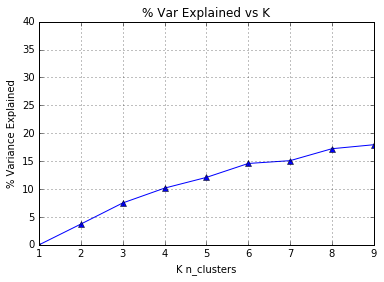

In [25]:
%matplotlib inline
import matplotlib as mpl
import matplotlib.pyplot as plt

from mpl_toolkits.mplot3d import Axes3D
from mpl_toolkits.mplot3d import proj3d

fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, (bss/tss)*100, '^-')
ax.set_ylim((0,40))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

### Also Using Principal Component to find the appropriate number of clusters

In [26]:
from sklearn.decomposition import PCA, RandomizedPCA
import time
start_time = time.time()

from sklearn.feature_extraction import text 

tfidf_review = TfidfVectorizer(binary=False, stop_words='english', use_idf = True, norm = 'l1', lowercase=True, 
                         max_df=0.95, min_df=0.05, ngram_range = (1,2)) 


# fit and transform text

review_dm = tfidf_review.fit_transform(reviewdf['cleantext'])


for i in range(1,len(tfidf_review.get_feature_names())-1, 25):

    pca = PCA(n_components=i)


    X_pca = pca.fit_transform(review_dm.toarray())


    print "Number of components: " + str(i)
    print 'PCA Explained Variance Ratio: '+ str(pca.explained_variance_ratio_)
    print 'PCA Total Variance Explained: ' + str(sum(pca.explained_variance_ratio_))
    #print X_pca

print("--- %s seconds ---" % (time.time() - start_time))

Number of components: 1
PCA Explained Variance Ratio: [ 0.04675011]
PCA Total Variance Explained: 0.046750106897
Number of components: 26
PCA Explained Variance Ratio: [ 0.04675011  0.03703764  0.03270342  0.02738155  0.02542959  0.02395928
  0.02261329  0.02230481  0.02066333  0.02033943  0.01872531  0.01819891
  0.01665098  0.01644928  0.01577016  0.01529097  0.01516059  0.01482531
  0.01340474  0.01321599  0.01241089  0.0122159   0.01207005  0.01171903
  0.01151572  0.01117883]
PCA Total Variance Explained: 0.507985105001
Number of components: 51
PCA Explained Variance Ratio: [ 0.04675011  0.03703764  0.03270342  0.02738155  0.02542959  0.02395928
  0.02261329  0.02230481  0.02066333  0.02033943  0.01872531  0.01819891
  0.01665098  0.01644928  0.01577016  0.01529097  0.01516059  0.01482531
  0.01340474  0.01321599  0.01241089  0.0122159   0.01207005  0.01171903
  0.01151572  0.01117883  0.01094398  0.01070349  0.0104815   0.01004899
  0.00970754  0.00964073  0.00945509  0.00931543 

### Randomize PCA

In [27]:
start_time = time.time()
for i in range(1,len(tfidf_review.get_feature_names())-1, 25):

    rpca = RandomizedPCA(n_components=i)
    X_rpca = rpca.fit_transform(review_dm.toarray())
    print "Number of components: " + str(i)
    print 'PCA Explained Variance Ratio: '+ str(rpca.explained_variance_ratio_)
    print 'PCA Total Variance Explained: ' + str(sum(rpca.explained_variance_ratio_))
    # print type(X_rpca)
    
print("--- %s seconds ---" % (time.time() - start_time))

Number of components: 1
PCA Explained Variance Ratio: [ 0.04665921]
PCA Total Variance Explained: 0.0466592134962
Number of components: 26
PCA Explained Variance Ratio: [ 0.04674982  0.03703676  0.03270045  0.02737823  0.02542005  0.02395121
  0.02258178  0.02228886  0.02062437  0.02032087  0.01864497  0.01814526
  0.01659527  0.0163397   0.01570053  0.01518366  0.01504501  0.0145782
  0.01331132  0.01312098  0.01219931  0.01177677  0.01154576  0.01128628
  0.01111343  0.01078359]
PCA Total Variance Explained: 0.504422456322
Number of components: 51
PCA Explained Variance Ratio: [ 0.0467501   0.03703761  0.03270333  0.02738136  0.02542934  0.02395881
  0.0226127   0.02230384  0.0206625   0.02033826  0.01872446  0.01819711
  0.01664678  0.01644553  0.0157673   0.01528825  0.01515297  0.01482047
  0.01339612  0.01320076  0.01238459  0.01220007  0.01205514  0.01169673
  0.01149559  0.01115207  0.01092416  0.01067854  0.01045981  0.01000594
  0.00962497  0.00959416  0.00942629  0.0092401  

### Using top 75 componets, which almost explains 84% of variation in the data 

In [28]:


rpca = RandomizedPCA(n_components=75)
X_rpca = rpca.fit_transform(review_dm.toarray())
rindex = range(0, 75)

rcompframe = pd.DataFrame(rpca.components_,index = rindex, columns = tfidf_review.get_feature_names())

In [29]:
rcompframe.head()

,actually,amazing,area,ask,asked,ate,away,awesome,bad,bar,...,waiting,waitress,want,wanted,wasn,way,went,work,worth,yes
0,0.005307,-0.040629,-0.007794,-0.004775,0.001808,-0.014527,0.004963,0.006526,0.012544,-0.002154,...,-0.012248,-0.085507,0.016286,0.005319,-0.012512,-0.011748,-0.007364,-0.001560,-0.020270,0.000752
1,-0.018884,0.009926,-0.019751,-0.051443,-0.010270,0.019852,-0.007131,0.054634,-0.036295,-0.039289,...,-0.015076,0.200900,-0.029215,-0.014019,-0.022884,-0.022164,-0.015226,-0.003669,0.009536,-0.004607
2,-0.018646,0.040314,-0.008897,-0.000944,-0.003572,0.001732,-0.027579,-0.003937,-0.037095,-0.014127,...,-0.018590,0.173916,0.009785,0.009736,-0.009375,-0.003150,-0.004998,0.002864,-0.011393,0.001808
3,-0.021191,0.003056,0.015033,0.030895,0.025788,0.003621,-0.037844,-0.084087,0.047412,-0.000477,...,-0.006396,0.251401,0.006086,0.000791,0.024420,0.008780,-0.006787,0.005168,0.008542,0.014443
4,-0.006928,-0.015236,0.007878,-0.012014,0.001015,0.000680,0.079096,0.013571,-0.011966,-0.004975,...,-0.015703,-0.130142,0.005034,-0.020730,-0.027310,-0.016538,-0.019657,-0.009246,0.005377,0.000942


### Finding the Number of clusters

In [30]:
# finding an optimal value for k
k_range = range(1,10)
k_means_set = [KMeans(n_clusters=k,init='k-means++', max_iter=100, random_state = 50).fit(X_rpca) for k in k_range]
centroids_list = [km_result.cluster_centers_ for km_result in k_means_set]

In [31]:

k_euclid = [cdist(X_rpca, thing, 'euclidean') for thing in centroids_list]
distance_set = [np.min(k_euc, axis=1) for k_euc in k_euclid]

# total within-cluster sum of squares
wcss = [np.sum(distance**2) for distance in distance_set]

# total sum of squares
tss  = np.sum(pdist(X_rpca)**2) / X_rpca.shape[0]

# between cluster sum of squares
bss = tss - wcss

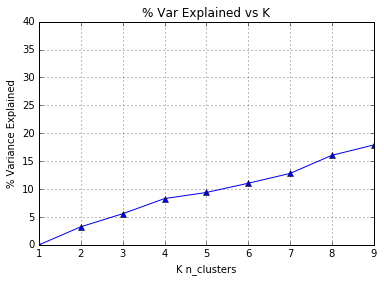

In [32]:
# plot elbow chart


fig = plt.figure()
ax = fig.add_subplot(111)
ax.plot(k_range, bss/tss*100, '^-')
ax.set_ylim((0,40))
plt.grid(True)
plt.xlabel('K n_clusters')
plt.ylabel('% Variance Explained')
plt.title('% Var Explained vs K')

### Q2. How many clusters did you “find”? Why did you select that number? Can you easily describe your clusters with a text label?  Why or why not? (15 points)

Looks like 4 Nos of cluster will be appropriate for this dataset. From the above diagram, there is a small elbow near 4th Cluster, but still its capturing more variation at 5th cluster and so on. For simplicity I'll restrict the number of cluster to 5. It is hard to describe the clusters with text. We could see the sentiment but it is hard to describe with text labels

In [33]:
My_k = 5
km = KMeans(n_clusters=My_k, init='k-means++', max_iter=100, random_state = 50)
review_k = km.fit(X_rpca)
clusters = km.labels_.tolist()
reviewdf['PCAclusters'] = clusters

In [34]:
print reviewdf['clusters'].value_counts()
print reviewdf['PCAclusters'].value_counts()
reviewdf.head(2)


1    304
0     85
2      3
Name: clusters, dtype: int64
2    296
0     58
1     35
4      2
3      1
Name: PCAclusters, dtype: int64


,comment,date,cleantext,clusters,PCAclusters
0,"Ugh, you guys made me so happy tonight and don't even know it. I wanted to keep it simple tonight and went for Red Lobster in Times Square. It was also one of the restaurants close to Port Authority. If I can give anyone advice, it would be to sit at the bar, you'll get your food faster. But I also visited after hours so there was barely anyone there. Based on the receipt, my waitress was Doly? Girl, thank you! She was so sweet and kind and her partner was also. He (I didn't get his name) actually suggested the mojito for me because I had not tried it before and low and behold! It tasted exactly like my grandma's lemonade. So either they didn't make it right or my grandma has been sneaking in some good stuff and trying to get us tipsy all along. *scratches head* Either way, I loved it. The only thing I'm kinda not happy about was my $45 tab. Like. Really. I was by myself. How did I do that? Trust me when I tell you that I suck at saving and never mind the fact that food is my life.. I will spend my entire paycheck at one restaurant. Trust and believe me! Anyway, thank you Red Lobster.. For being there when I needed you the most and for taking all my money.",5/6/2016,"ugh, you guys made me so happy tonight and don't even know it. i wanted to keep it simple tonight and went for rlob in tsqruare. it was also one of the restaurants close to port authority. if i can give anyone advice, it would be to sit at the bar, you'll get your food faster. but i also visited after hours so there was barely anyone there. based on the receipt, my waitress was doly? girl, thank you! she was so sweet and kind and her partner was also. he (i didn't get his name) actually suggested the mojito for me because i had not tried it before and low and behold! it tasted exactly like my grandma's lemonade. so either they didn't make it right or my grandma has been sneaking in some good stuff and trying to get us tipsy all along. *scratches head* either way, i loved it. the only thing i'm kinda not happy about was my $45 tab. like. really. i was by myself. how did i do that? trust me when i tell you that i suck at saving and never mind the fact that food is my life.. i will spend my entire paycheck at one restaurant. trust and believe me! anyway, thank you rlob.. for being there when i needed you the most and for taking all my money.",1,2
1,"I was here with my friend because we were in the area and needed to kill time before our next move. Long story short, I saw a mouse scurry across the room. I didn't want to make a big deal of it. I told the waiter. Literally nothing was done. He didn't update us saying he'd told the manager about it or ask me any additional questions at all. He just said ""okay"". Like....I am in your restaurant telling you I just saw a mouse. This was in the early evening (4 ish) and was not busy at all. He just really lacked customer service. I definitely will not be returning here.",5/19/2016,"i was here with my friend because we were in the area and needed to kill time before our next move. long story short, i saw a mouse scurry across the room. i didn't want to make a big deal of it. i told the waiter. literally nothing was done. he didn't update us saying he'd told the manager about it or ask me any additional questions at all. he just said ""okay"". like....i am in your restaurant telling you i just saw a mouse. this was in the early evening (4 ish) and was not busy at all. he just really lacked customer service. i definitely will not be returning here.",1,2


### T3. Train 3 different classifiers on each dataset and assess their ability to accurately predict the cluster assignment.


In [35]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X = review_dm.toarray()  #remember this is the output from the vectorizer
print type(X)


y = reviewdf['PCAclusters'].values #this is an array of labels
print type(y)

print y[0:5]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
[2 2 2 2 2]


### Splitting 40:60

In [36]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X_train.shape
print X_test.shape
print y_train.shape
print y_test.shape

(235L, 166L)
(157L, 166L)
(235L,)
(157L,)


### Decision Tree Classifier

In [37]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_pre = DecisionTreeClassifier(random_state = 50)
DecisionTree_pre.fit(X_train, y_train)

# make predictions
clf1_expected = y_test
clf1_predicted = DecisionTree_pre.predict(X_test)


print DecisionTree_pre.score(X_test,y_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.764331210191
accuracy: 0.764331210191
             precision    recall  f1-score   support

          0       0.71      0.43      0.53        28
          1       0.50      0.31      0.38        16
          2       0.79      0.92      0.85       112
          4       0.00      0.00      0.00         1

avg / total       0.74      0.76      0.74       157



C:\Anaconda2\lib\site-packages\sklearn\metrics\classification.py:1074: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


## 2. Naive Bayes

In [38]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_pre = MultinomialNB()
print NaiveBayes_pre
NaiveBayes_pre.fit(X_train, y_train)

# make predictions
clf2_expected = y_test
clf2_predicted = NaiveBayes_pre.predict(X_test)

print NaiveBayes_pre.score(X_test, y_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.713375796178
accuracy: 0.713375796178
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        28
          1       0.00      0.00      0.00        16
          2       0.71      1.00      0.83       112
          4       0.00      0.00      0.00         1

avg / total       0.51      0.71      0.59       157



### Logistic Regression

In [39]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_pre = LogisticRegression(random_state = 50)
print logit_pre
logit_pre.fit(X_train, y_train)
print logit_pre.score(X_test, y_test)

# make predictions
clf3_expected = y_test
clf3_predicted = logit_pre.predict(X_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.713375796178
accuracy: 0.713375796178
             precision    recall  f1-score   support

          0       0.00      0.00      0.00        28
          1       0.00      0.00      0.00        16
          2       0.71      1.00      0.83       112
          4       0.00      0.00      0.00         1

avg / total       0.51      0.71      0.59       157



In [41]:
df =""
columns = ['Model NO', 'Name', 'Processing Parameters','Model Accuracy']
df = pd.DataFrame(columns=columns) 
df.loc[len(df)]=['Model 1','PCAclusters_Decision Tree','binary=False, stop_words="english", use_idf = False, norm = "l1","lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 DecisionTree_pre.score(X_test,y_test)]
df.loc[len(df)]=['Model 2','PCAclusters_Naive Bayes','binary=False, stop_words="english", use_idf = False, norm = "l1","lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 NaiveBayes_pre.score(X_test, y_test)]
df.loc[len(df)]=['Model 3','PCAclusters_Logistic Regression','binary=False, stop_words="english", use_idf = False, norm = "l1", "lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 NaiveBayes_pre.score(X_test, y_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
0,Model 1,PCAclusters_Decision Tree,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.764331
1,Model 2,PCAclusters_Naive Bayes,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376
2,Model 3,PCAclusters_Logistic Regression,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"", ""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376


### Q3. Which model performed best?  How does that compare to previous predictive models you may have used on this dataset? How might this be useful for your question? (15 points)

Decision Tree performing the best on this dataset. In my previous analysis Naive Bayes was performing well with 77% accuracy, this time also it the model predicting with accuracy of almost 76.5%. With this analysis we could group the customer together based on some criteria.

### Bonus: (10 points): Extract one or two of the most common tokens from each cluster and assign those as labels.  Repeat the classification exercise to predict these new labels using 3 different models (hint: you can just change the settings). Do the results surprise you?

### Predicted top 4 words for each cluster

In [44]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_review.get_feature_names()
for i in range(5):
    print("Comment %d:" % i)
    for ind in order_centroids[i, :4]:
        print(' %s' % terms[ind])
    print

Top terms per cluster:
Comment 0:
 asked
 actually
 away
 better

Comment 1:
 amazing
 ask
 actually
 best

Comment 2:
 bar
 cooked
 check
 eat

Comment 3:
 area
 awesome
 asked
 actually

Comment 4:
 ate
 amazing
 area
 ask



### Considering only 1 Top word from each cluster and running the classificatio algorithm to predict the accuracy

In [45]:
print("Top terms per cluster:")
order_centroids = km.cluster_centers_.argsort()[:, ::-1]
terms = tfidf_review.get_feature_names()
for i in range(5):
    print("Comment %d:" % i)
    for ind in order_centroids[i, :1]:
        print(' %s' % terms[ind])
    print

Top terms per cluster:
Comment 0:
 asked

Comment 1:
 amazing

Comment 2:
 bar

Comment 3:
 area

Comment 4:
 ate



In [46]:
# replace contractions
import re

# using dictionaries

cluster_dict = { '0':'actually','1':'ask','2':'birthday', '3':'amazing', '4':'area'}


def multiple_replace1(dict, text): 

  """ Replace in 'text' all occurences of any key in the given
  dictionary by its corresponding value.  Returns the new tring.""" 
  text = str(text).lower()

  # Create a regular expression  from the dictionary keys
  regex = re.compile("(%s)" % "|".join(map(re.escape, dict.keys())))

  # For each match, look-up corresponding value in dictionary
  return regex.sub(lambda mo: dict[mo.string[mo.start():mo.end()]], text)

In [47]:
reviewdf['PCAclusters_top_terms'] = map(lambda x: multiple_replace1(cluster_dict, x), reviewdf['PCAclusters'])
reviewdf[7:8] 

,comment,date,cleantext,clusters,PCAclusters,PCAclusters_top_terms
7,"Went for an early lunch. Service was great, food amazing. The cheesy biscuits were to die for. Had the lobster mac & cheese starter.....incredible!!! All the food was well presented, fresh and delicious. Would go back in a heartbeat!",4/5/2016,"went for an early lunch. service was great, food amazing. the cbiscuits were to die for. had the lobster mac & cheese starter.....incredible!!! all the food was well presented, fresh and delicious. would go back in a heartbeat!",0,2,birthday


In [48]:
# train test split
# data are X, labels are y
from sklearn.cross_validation import train_test_split

X1 = review_dm.toarray()  #remember this is the output from the vectorizer
print type(X1)


y1 = reviewdf['PCAclusters_top_terms'].values #this is an array of labels
print type(y1)

print y1[0:5]

<type 'numpy.ndarray'>
<type 'numpy.ndarray'>
['birthday' 'birthday' 'birthday' 'birthday' 'birthday']


In [49]:
X1_train, X1_test, y1_train, y1_test = train_test_split(X1, y1, test_size=0.4, random_state=50) #random_state is set seed

# function creates 4 output structures - order matters
print X1_train.shape
print X1_test.shape
print y1_train.shape
print y1_test.shape

(235L, 166L)
(157L, 166L)
(235L,)
(157L,)


In [50]:
# Decision Tree Classifier
from sklearn import metrics
from sklearn.tree import DecisionTreeClassifier

# fit a CART_model to the data
DecisionTree_pre = DecisionTreeClassifier(random_state = 50)
DecisionTree_pre.fit(X1_train, y1_train)

# make predictions
clf1_expected = y1_test
clf1_predicted = DecisionTree_pre.predict(X1_test)


print DecisionTree_pre.score(X1_test,y1_test)

# summarize the fit of the CART_Model
print("accuracy: " + str(metrics.accuracy_score(clf1_expected, clf1_predicted)))
print(metrics.classification_report(clf1_expected, clf1_predicted))

0.764331210191
accuracy: 0.764331210191
             precision    recall  f1-score   support

   actually       0.71      0.43      0.53        28
       area       0.00      0.00      0.00         1
        ask       0.50      0.31      0.38        16
   birthday       0.79      0.92      0.85       112

avg / total       0.74      0.76      0.74       157



In [51]:
# Multinomial Naive Bayes
from sklearn.naive_bayes import MultinomialNB

# fit a Naive_Bayes_model to the data
NaiveBayes_pre = MultinomialNB()
print NaiveBayes_pre
NaiveBayes_pre.fit(X1_train, y1_train)

# make predictions
clf2_expected = y1_test
clf2_predicted = NaiveBayes_pre.predict(X1_test)

print NaiveBayes_pre.score(X1_test, y1_test)

# summarize the fit of the Naivebayes
print("accuracy: " + str(metrics.accuracy_score(clf2_expected, clf2_predicted)))
print(metrics.classification_report(clf2_expected, clf2_predicted))

MultinomialNB(alpha=1.0, class_prior=None, fit_prior=True)
0.713375796178
accuracy: 0.713375796178
             precision    recall  f1-score   support

   actually       0.00      0.00      0.00        28
       area       0.00      0.00      0.00         1
        ask       0.00      0.00      0.00        16
   birthday       0.71      1.00      0.83       112

avg / total       0.51      0.71      0.59       157



In [52]:
# Logistic Regression
from sklearn.linear_model import LogisticRegression

# fit a logistic regression model to the data
logit_pre = LogisticRegression(random_state = 50)
print logit_pre
logit_pre.fit(X1_train, y1_train)
print logit_pre.score(X1_test, y1_test)

# make predictions
clf3_expected = y1_test
clf3_predicted = logit_pre.predict(X1_test)

# summarize the fit of the logit_pre_model
print("accuracy: " + str(metrics.accuracy_score(clf3_expected, clf3_predicted)))
print(metrics.classification_report(clf3_expected, clf3_predicted))

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
          penalty='l2', random_state=50, solver='liblinear', tol=0.0001,
          verbose=0, warm_start=False)
0.713375796178
accuracy: 0.713375796178
             precision    recall  f1-score   support

   actually       0.00      0.00      0.00        28
       area       0.00      0.00      0.00         1
        ask       0.00      0.00      0.00        16
   birthday       0.71      1.00      0.83       112

avg / total       0.51      0.71      0.59       157



In [53]:
df.loc[len(df)]=['Model 4','PCAclusters_Decision Tree','binary=False, stop_words="english", use_idf = False, norm = "l1","lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 DecisionTree_pre.score(X1_test,y1_test)]
df.loc[len(df)]=['Model 5','PCAclusters_Naive Bayes','binary=False, stop_words="english", use_idf = False, norm = "l1","lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 NaiveBayes_pre.score(X1_test, y1_test)]
df.loc[len(df)]=['Model 6','PCAclusters_Logistic Regression','binary=False, stop_words="english", use_idf = False, norm = "l1", "lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)"',
                 NaiveBayes_pre.score(X1_test, y1_test)]
result = df.sort_values(by= 'Model Accuracy',ascending=False)
result

,Model NO,Name,Processing Parameters,Model Accuracy
0,Model 1,PCAclusters_Decision Tree,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.764331
3,Model 4,PCAclusters_Decision Tree,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.764331
1,Model 2,PCAclusters_Naive Bayes,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376
2,Model 3,PCAclusters_Logistic Regression,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"", ""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376
4,Model 5,PCAclusters_Naive Bayes,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"",""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376
5,Model 6,PCAclusters_Logistic Regression,"binary=False, stop_words=""english"", use_idf = False, norm = ""l1"", ""lowercase=True, max_df=0.95, min_df=0.05, ngram_range = (1,2)""",0.713376


### Model is doing equally good in terms of predicting the top word for these clusters